# Analisis de las métricas de los modelos para las variables vegetativas
## Grass

In [6]:
# Extraer las métricas de las evaluaciones de los modelos
from utils.evaluation import gather_model_metrics

base_dir = '../../results/grass'
grass_variables = ['VWC', 'total_biomass', 'IBA']

metrics_grass = gather_model_metrics(base_dir, grass_variables, model_folders=None)
# Cambiar las filas de 'target' = 'total_biomass' a 'biomass'
metrics_grass['target'] = metrics_grass['target'].replace('total_biomass', 'biomass')
metrics_grass.head()

,model,target,metric,set,value
0,Linear Regression,IBA,RMSE,train,1406.494168
1,Linear Regression,IBA,RMSE,val,1088.018326
2,Linear Regression,IBA,MAE,train,952.462735
3,Linear Regression,IBA,MAE,val,828.322481
4,Linear Regression,IBA,R2,train,0.363718


In [7]:
# Crear la tabla organizada de metricas
from utils.evaluation import create_metrics_table
grass_pivot = create_metrics_table(metrics_grass, export_to_latex=True, filepath='../../results/grass/latex_metrics_grass.txt')
grass_pivot.head()

,Model,Target,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
0,LightGBM,IBA,615.07,716.51,0.69,0.08,42.66,54.96
1,LightGBM,VWC,48.78,70.44,0.68,0.37,27.82,40.83
2,LightGBM,biomass,195.14,281.77,0.68,0.37,27.82,40.83
3,Linear Regression,IBA,952.46,828.32,0.36,-0.19,61.47,62.48
4,Linear Regression,VWC,75.78,83.30,0.25,0.09,42.65,48.93


In [8]:
# Obtener el promedio por modelo y excluir la columna 'Target'
mean_metrics = grass_pivot.drop(columns=['Target'])
mean_metrics = mean_metrics.groupby('Model').mean()
# Redondear a dos decimales
mean_metrics = mean_metrics.round(2)
mean_metrics


,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
Model,,,,,,
LightGBM,286.33,356.24,0.68,0.27,32.77,45.54
Linear Regression,443.78,414.94,0.29,-0.00,48.92,53.45
Nadaraya-Watson,389.19,383.61,0.44,0.16,44.23,48.85
Random Forest,354.91,350.87,0.56,0.26,39.62,46.09


In [4]:
# imprimir el modelo con mejores resultados para cada variable objetivo
best_models = grass_pivot.loc[grass_pivot.groupby('Target')['R2 (train)'].idxmax()]
best_models

,Model,Target,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
0,LightGBM,IBA,615.07,716.51,0.69,0.08,42.66,54.96
1,LightGBM,VWC,48.78,70.44,0.68,0.37,27.82,40.83
2,LightGBM,biomass,195.14,281.77,0.68,0.37,27.82,40.83


### Graficas

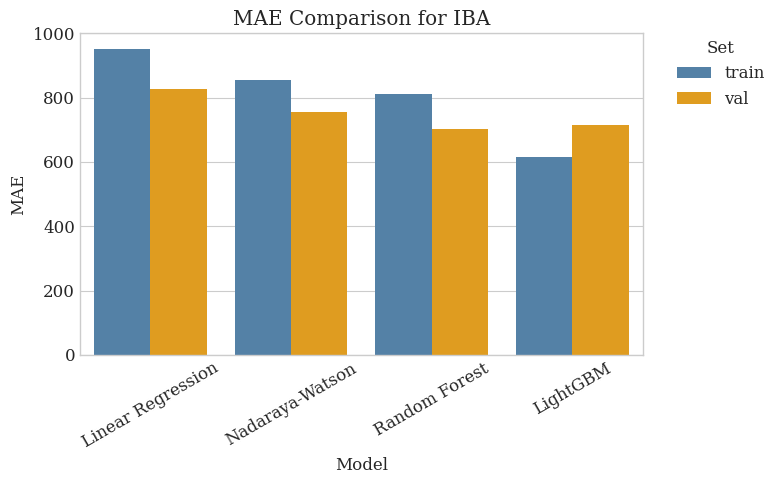

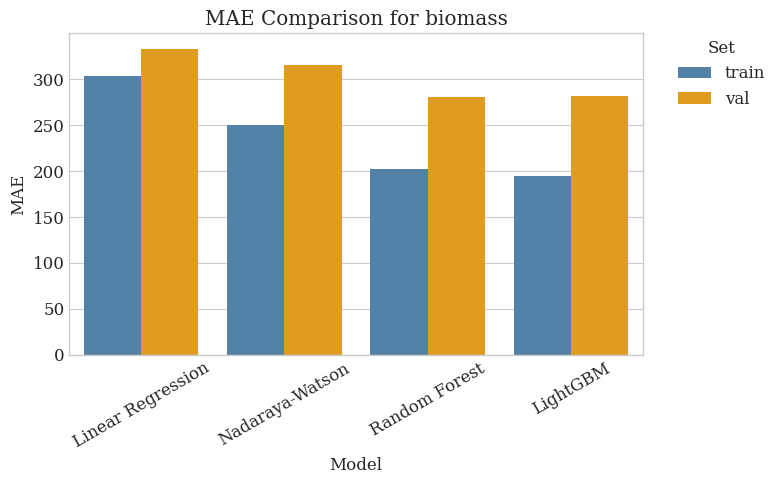

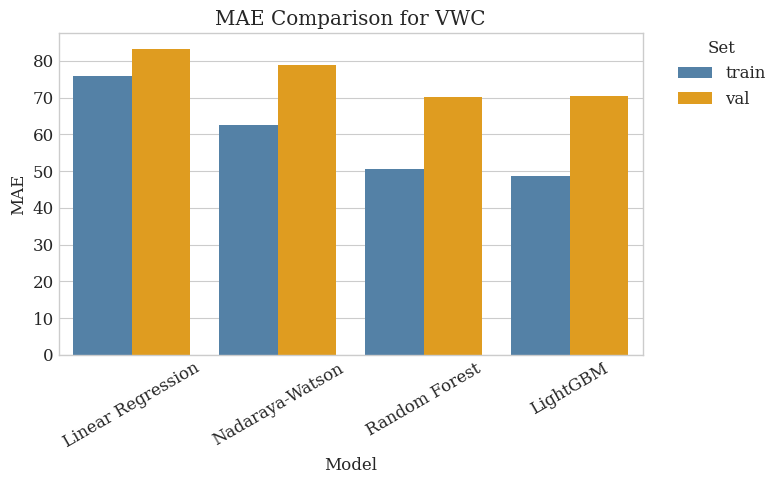

In [5]:
from utils.evaluation import plot_metric_by_model

# Graficar MAE por modelo para cada variable objetivo
plot_metric_by_model(metrics_grass, 'MAE', 'MAE', output_dir='../../results/grass/metrics')


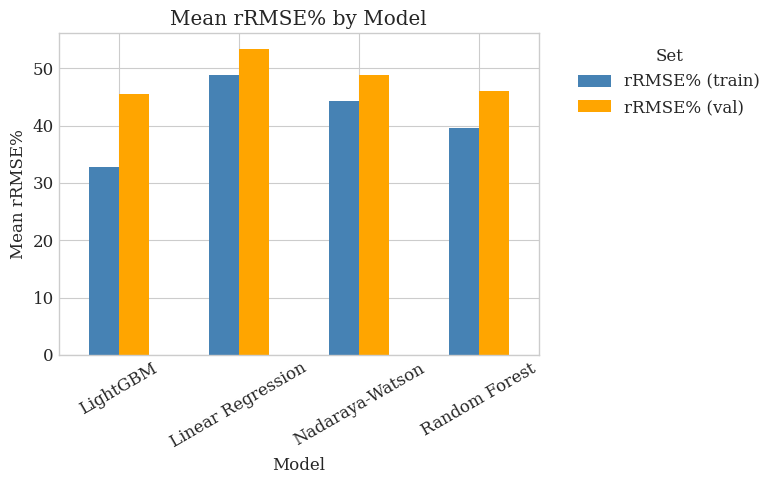

In [11]:
# Realizar un graico de barras para mean metrics rmse%
from utils.evaluation import plot_mean_metrics
plot_mean_metrics(mean_metrics, figsize=(8, 5), output_dir='../../results/grass/metrics')

## Citrus

In [16]:
# Extraer las métricas para los citricos
base_dir = '../../results/canopy'
citrus_variables = ['tree_height', 'canopy_diam', 'biomass']

model_folders = {
            'Linear Regression': 'artifacts_linear',
            'Nadaraya-Watson': 'artifacts_nadaraya-watson',
            'Random Forest': 'artifacts_rf',
            'LightGBM': 'artifacts_lgbm'
        }

metrics_citrus = gather_model_metrics(base_dir, citrus_variables, model_folders=model_folders)
# Cambiar nombre de filas
metrics_citrus['target'] = metrics_citrus['target'].replace('tree_height', 'Tree height')
metrics_citrus['target'] = metrics_citrus['target'].replace('canopy_diam', 'Canopy diameter')
metrics_citrus['target'] = metrics_citrus['target'].replace('biomass', 'Biomass')
metrics_citrus.head()

,model,target,metric,set,value
0,Linear Regression,Biomass,RMSE,train,16.915919
1,Linear Regression,Biomass,RMSE,val,19.262648
2,Linear Regression,Biomass,MAE,train,13.997424
3,Linear Regression,Biomass,MAE,val,16.314297
4,Linear Regression,Biomass,R2,train,0.143984


In [17]:
# Crear la tabla organizada de metricas
from utils.evaluation import create_metrics_table
citrus_pivot = create_metrics_table(metrics_citrus, export_to_latex=True, filepath='../../results/canopy/latex_metrics_canopy.txt')
citrus_pivot.head()

,Model,Target,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
0,LightGBM,Biomass,5.44,8.99,0.85,0.63,29.77,50.31
1,LightGBM,Canopy diameter,0.36,0.65,0.70,0.22,13.38,28.83
2,LightGBM,Tree height,0.26,0.37,0.87,0.70,11.90,18.98
3,Linear Regression,Biomass,14.00,16.31,0.14,0.13,71.21,77.23
4,Linear Regression,Canopy diameter,0.65,0.77,0.10,0.16,23.15,29.97


In [18]:
# Obtener el promedio por modelo y excluir la columna 'Target'
mean_metrics = citrus_pivot.drop(columns=['Target'])
mean_metrics = mean_metrics.groupby('Model').mean()
# Redondear a dos decimales
mean_metrics = mean_metrics.round(2)
mean_metrics

,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
Model,,,,,,
LightGBM,2.02,3.34,0.81,0.52,18.35,32.71
Linear Regression,5.12,5.95,0.13,0.13,41.49,46.79
Nadaraya-Watson,2.30,3.14,0.76,0.57,21.29,30.50
Random Forest,1.68,3.37,0.84,0.52,16.05,32.66


In [8]:
# imprimir el modelo con mejores resultados para cada variable objetivo
best_models = citrus_pivot.loc[citrus_pivot.groupby('Target')['R2 (train)'].idxmax()]
best_models

,Model,Target,MAE (train),MAE (val),R2 (train),R2 (val),rRMSE% (train),rRMSE% (val)
9,Random Forest,Biomass,4.46,9.07,0.89,0.62,25.47,51.08
10,Random Forest,Canopy diameter,0.35,0.66,0.73,0.22,12.72,28.83
11,Random Forest,Tree height,0.22,0.39,0.91,0.73,9.95,18.07


### Graficas

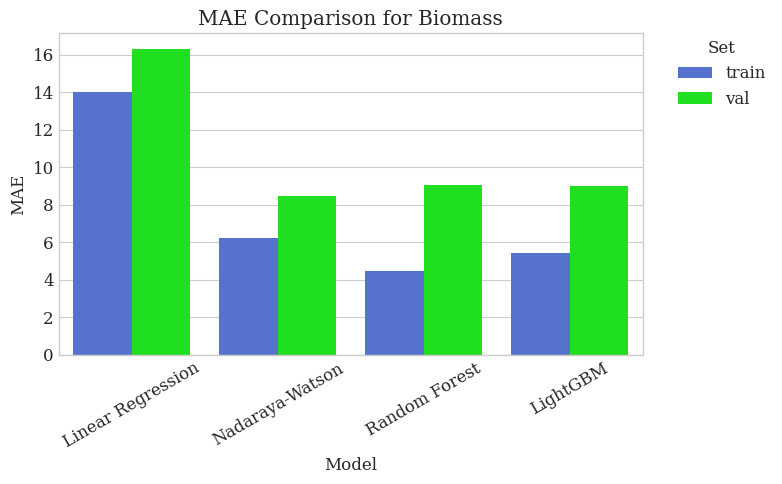

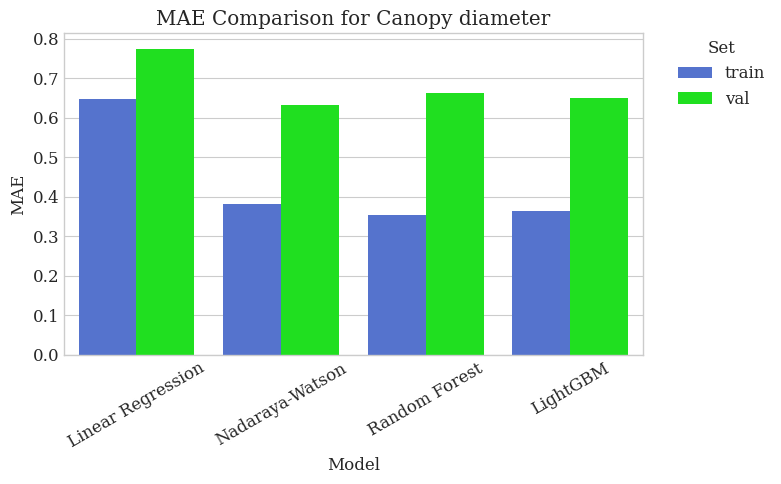

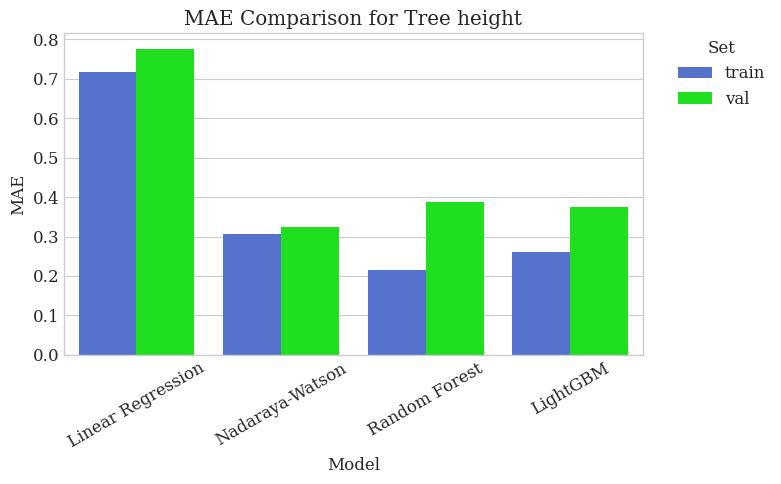

In [19]:
from utils.evaluation import plot_metric_by_model

# Graficar MAE por modelo para cada variable objetivo
plot_metric_by_model(metrics_citrus, 'MAE', 'MAE',  palette = {'train': 'royalblue', 'val': 'lime'}, output_dir='../../results/canopy/metrics')

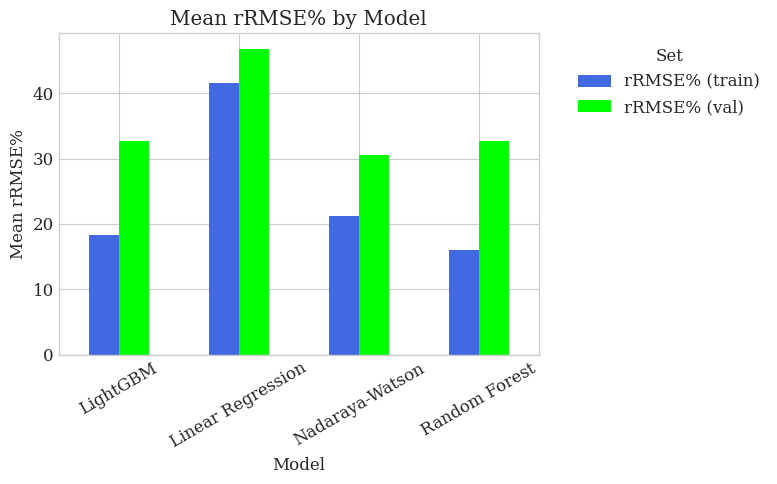

In [20]:
# Realizar un graico de barras para mean metrics rmse%
from utils.evaluation import plot_mean_metrics
plot_mean_metrics(mean_metrics, figsize=(8, 5), output_dir='../../results/canopy/metrics', my_palette={'RMSE% (train)': 'royalblue', 'RMSE% (val)': 'lime'})